# Let us read multiple csv files, one for each month.
# Then put them all in one single dataframe.

In [1]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Is there climate change in the near future?
# Are there more frequent extreme events, like excessive rainfall?
# Anything special during COVID19 years?
# You can look at other quantities like min/max temperatures, etc.

In [2]:
# You are provided with monthly data from January 1980 to January 2025.
# Define the year and month for the names of the csv files. The format is YYYYMM.

# One way is to use range(YYYY01, YYYY13) for all months of that year YYYY.
# The itertools.chain would concatenate all of them into one single list. Print out the list to view it.

ListOfMonths1 = list(itertools.chain(range(198001, 198013), range(198101, 198113), range(198201, 198213),
                                     range(198301, 198313), range(198401, 198413), range(198501, 198513),
                                     range(198601, 198613), range(198701, 198713), range(198801, 198813),
                                     range(198901, 198913), range(199001, 199013), range(199101, 199113),
                                     range(199201, 199213), range(199301, 199313), range(199401, 199413),
                                     range(199501, 199513), range(199601, 199613), range(199701, 199713),
                                     range(199801, 199813), range(199901, 199913), range(200001, 200013),
                                     range(200101, 200113), range(200201, 200213), range(200301, 200313),
                                     range(200401, 200413), range(200501, 200513), range(200601, 200613),
                                     range(200701, 200713), range(200801, 200813), range(200901, 200913),
                                     range(201001, 201013), range(201101, 201113), range(201201, 201213),
                                     range(201301, 201313), range(201401, 201413), range(201501, 201513),
                                     range(201601, 201613), range(201701, 201713), range(201801, 201813),
                                     range(201901, 201913), range(202001, 202013), range(202101, 202113),
                                     range(202201, 202213), range(202301, 202313), range(202401, 202413),
                                     range(202501, 202502)))

# Alternatively, this is a nested loop.
# This uses the built-in string function zfill to append 0 to an integer of desired length.
# E.g. the integer 1 to become the string '01'.

ListOfMonths2 = [int(str(YYYY) + str(MM).zfill(2)) for YYYY in range(1980, 2026) for MM in range(1, 13)]

# Delete February to December of 2025, since we only have January 2025 ...
ListOfMonths2 = ListOfMonths2[:-11]

### Are they the same?
print(ListOfMonths1 == ListOfMonths2)

# Okay, let us just use one of them.
ListOfMonths = ListOfMonths1

True


In [6]:
# List comprehension to read each csv file with the given YYYYMM, and appending that dataframe into a list.
# So you have a list of all the data frames for each YYYYMM.
ListOfDF = [pd.read_csv(f'Raw Data/DAILYDATA_S24_{element}.csv') for element in ListOfMonths]

# This will create a single dataframe, concatenating all of them.
df = pd.concat(ListOfDF)

# Replace '—' and '-' with NaN.
df.replace(['—', '-'], np.NaN, inplace=True)

df.to_csv("alldata.csv", index=False)  # Save the concatenated dataframe to a CSV file

# Let us take a look at your combined (rather, concatenated) dataframe!
df

,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),\,Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm)
0,Changi,1980,1,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Changi,1980,1,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Changi,1980,1,3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Changi,1980,1,4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Changi,1980,1,5,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,Changi,2025,1,27,11.0,NaN,NaN,NaN,25.3,29.5,23.2,12.9,40.7,NaN,3.6,4.4,6.4
27,Changi,2025,1,28,0.0,NaN,NaN,NaN,26.6,29.6,25.3,20.7,51.9,NaN,0.0,0.0,0.0
28,Changi,2025,1,29,0.0,NaN,NaN,NaN,26.4,29.2,24.9,20.1,57.4,NaN,0.0,0.0,0.0
29,Changi,2025,1,30,0.0,NaN,NaN,NaN,26.6,30.3,24.1,17.1,51.9,NaN,0.0,0.0,0.0


# We are dealing with time series. Let us set our datetime index.

In [30]:
# Let us create a datetime object using the year, month and day columns, and set that as the index of the dataframe.
df.set_index(pd.to_datetime(df[['Year', 'Month', 'Day']]), inplace=True)

# As a start, let us investigate these three quantities.
df = df[['Daily Rainfall Total (mm)', 'Mean Temperature (°C)', 'Mean Wind Speed (km/h)']]

# Set data types as float.
# Otherwise the "-" values replaced by "NaN" may make the data type as non-numeric and cannot be plotted.
df = df.astype(float)

# Only run this cell once.
# If you run it again, df no longer has the year, month and date columns to set the index ...

# Let us print out our simpler and better organised dataframe!
df

,Daily Rainfall Total (mm),Mean Temperature (°C),Mean Wind Speed (km/h)
1980-01-01,0.0,NaN,NaN
1980-01-02,0.0,NaN,NaN
1980-01-03,0.0,NaN,NaN
1980-01-04,0.0,NaN,NaN
1980-01-05,8.0,NaN,NaN
...,...,...,...
2025-01-27,11.0,25.3,12.9
2025-01-28,0.0,26.6,20.7
2025-01-29,0.0,26.4,20.1
2025-01-30,0.0,26.6,17.1


# <i><b><s>Very basic</s></b></i> EDA.

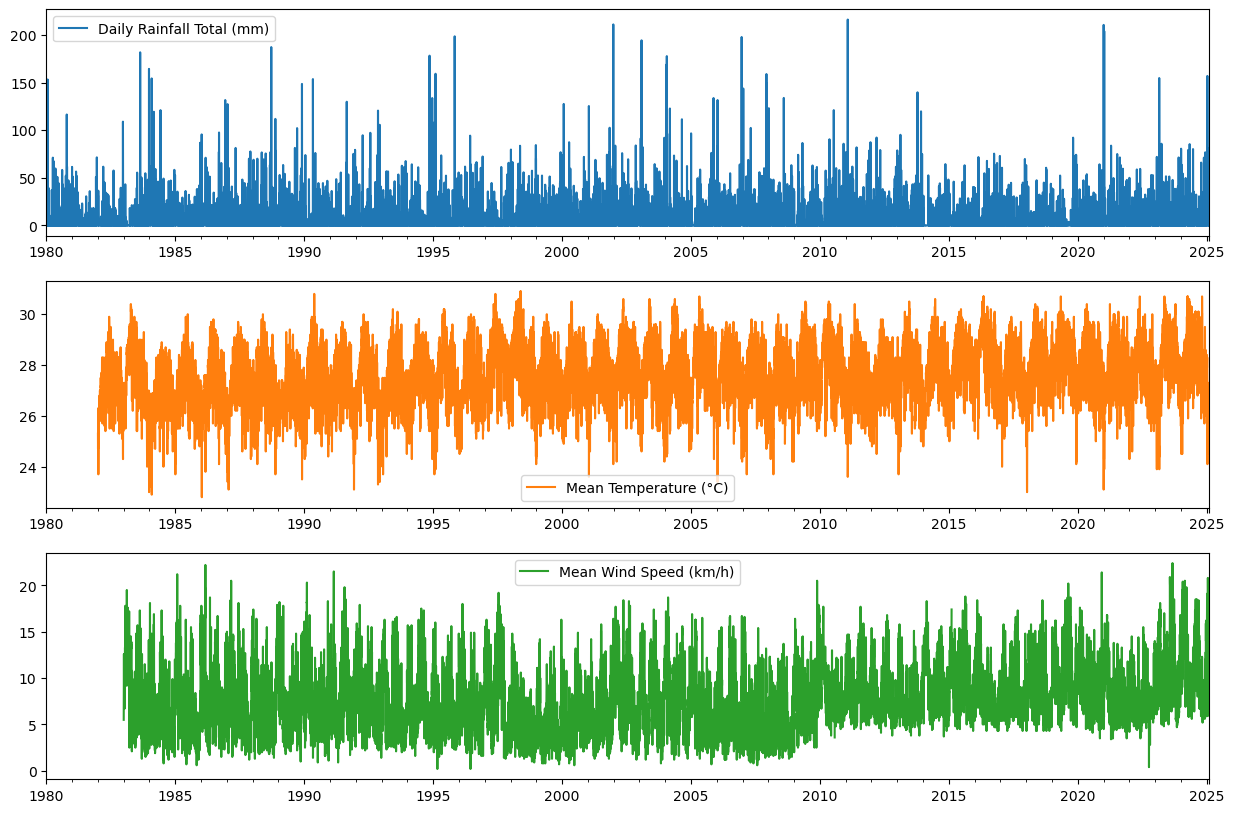

In [31]:
# Some plots of the raw data.

fig, ax = plt.subplots(3, 1, figsize=(15, 10))

df[['Daily Rainfall Total (mm)']].plot(ax=ax[0])
df[['Mean Temperature (°C)']].plot(ax=ax[1], c='C1')
df[['Mean Wind Speed (km/h)']].plot(ax=ax[2], c='C2')
plt.show()

In [32]:
# How about resampling, would that smoothen out the fluctuations?
# Or how about looking within a smaller time frame?

# Let us try smaller time frame first, this is easier.



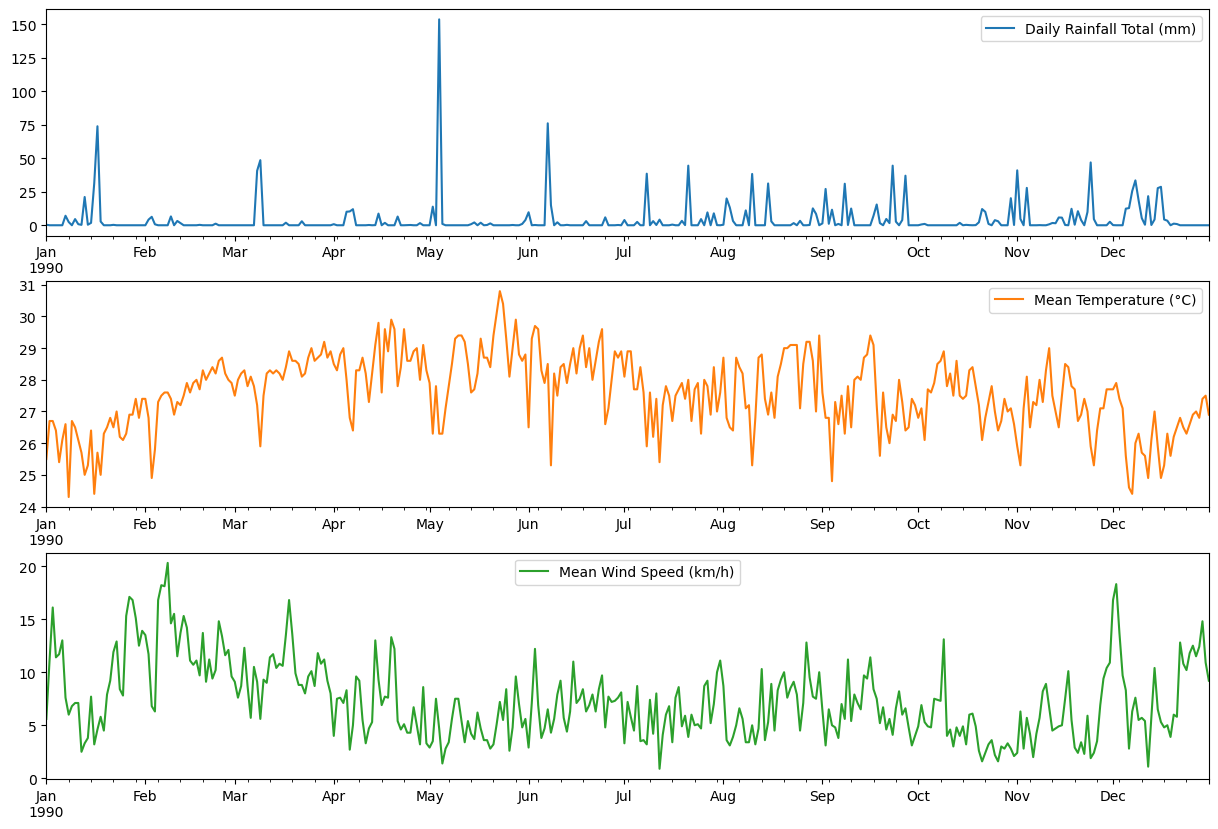

In [33]:
# Just one year.

fig, ax = plt.subplots(3, 1, figsize=(15, 10))

df[['Daily Rainfall Total (mm)']]['1990':'1990'].plot(ax=ax[0])
df[['Mean Temperature (°C)']]['1990':'1990'].plot(ax=ax[1], c='C1')
df[['Mean Wind Speed (km/h)']]['1990':'1990'].plot(ax=ax[2], c='C2')
plt.show()

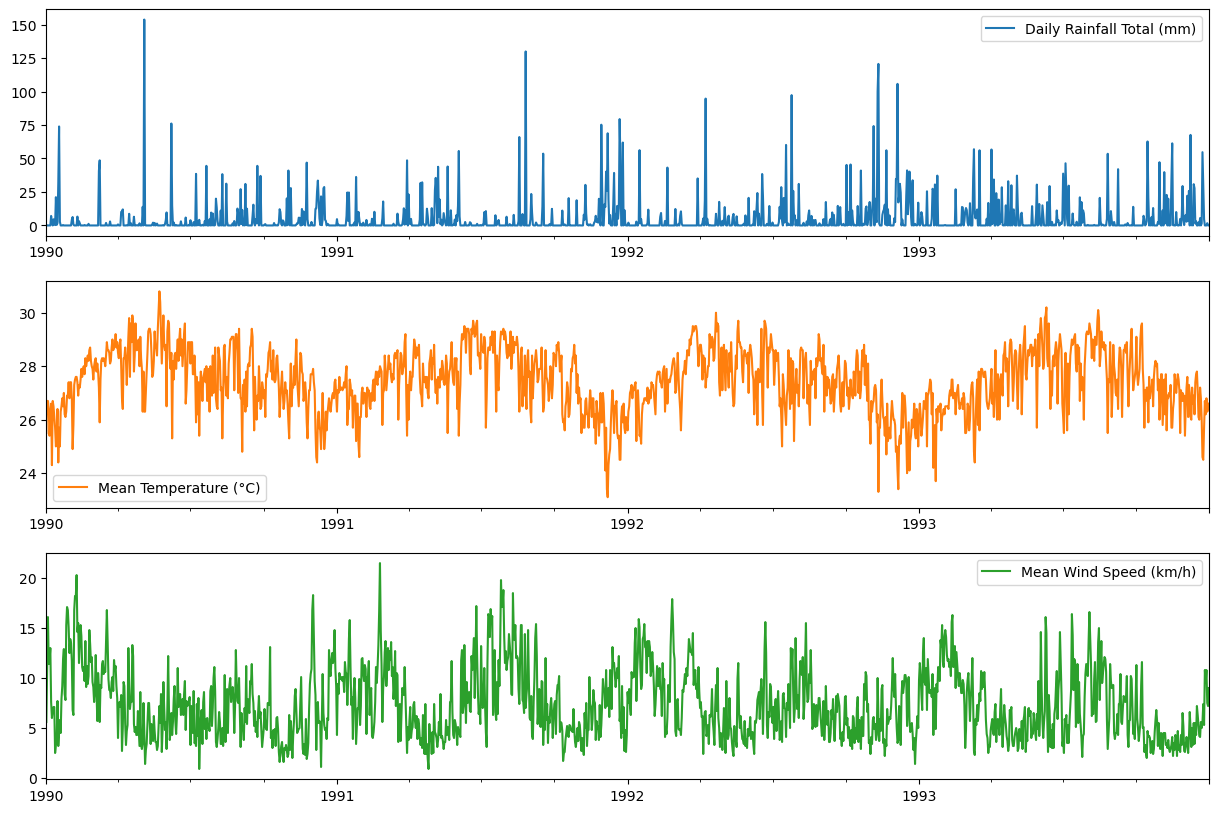

In [34]:
# How about over four years?
# Maybe ENSO? La Nini, El Nino southern oscillation? How often do they recur?

fig, ax = plt.subplots(3, 1, figsize=(15, 10))

df[['Daily Rainfall Total (mm)']]['1990':'1993'].plot(ax=ax[0])
df[['Mean Temperature (°C)']]['1990':'1993'].plot(ax=ax[1], c='C1')
df[['Mean Wind Speed (km/h)']]['1990':'1993'].plot(ax=ax[2], c='C2')
plt.show()

In [35]:
# So ... any insights?

# Fine, time for resampling.

In [36]:
df_weekly = df.resample('W').mean()
df_monthly = df.resample('ME').mean()

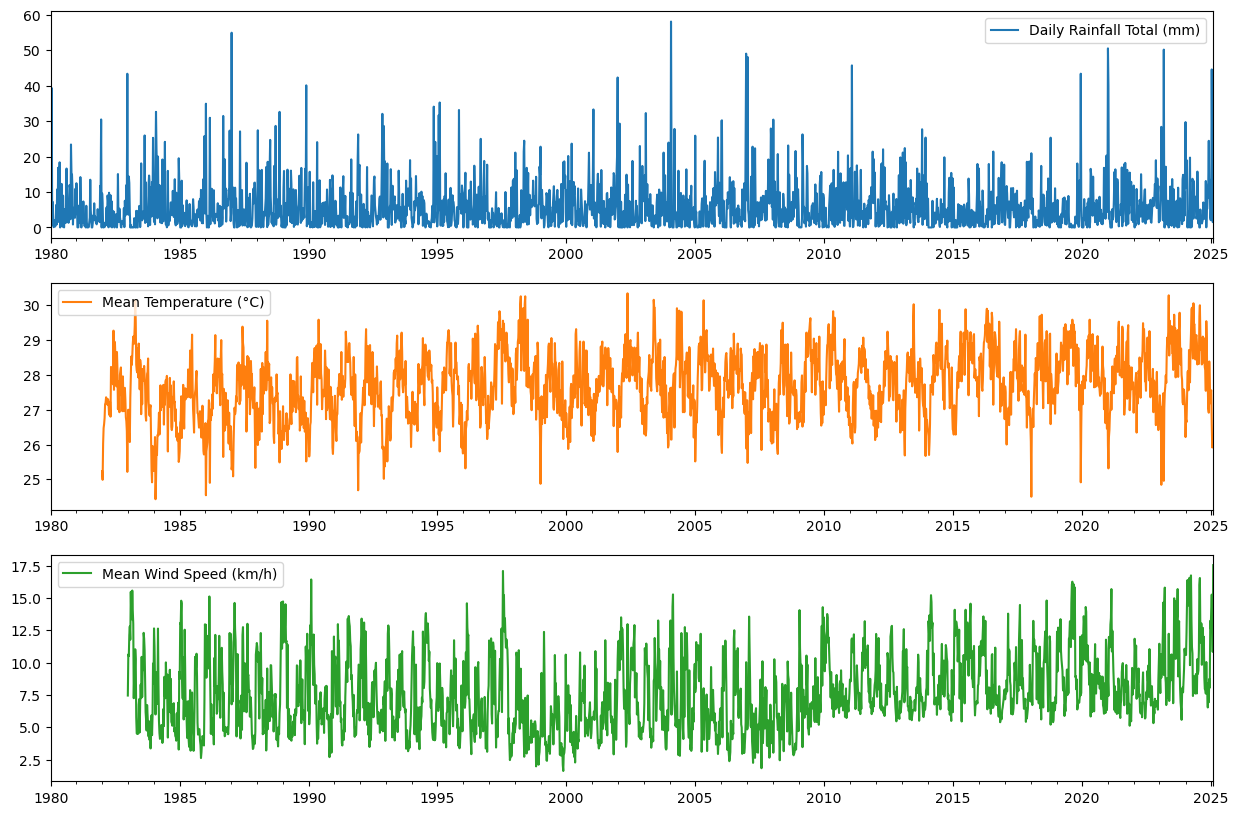

In [37]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10))

df_weekly[['Daily Rainfall Total (mm)']].plot(ax=ax[0])
df_weekly[['Mean Temperature (°C)']].plot(ax=ax[1], c='C1')
df_weekly[['Mean Wind Speed (km/h)']].plot(ax=ax[2], c='C2')
plt.show()

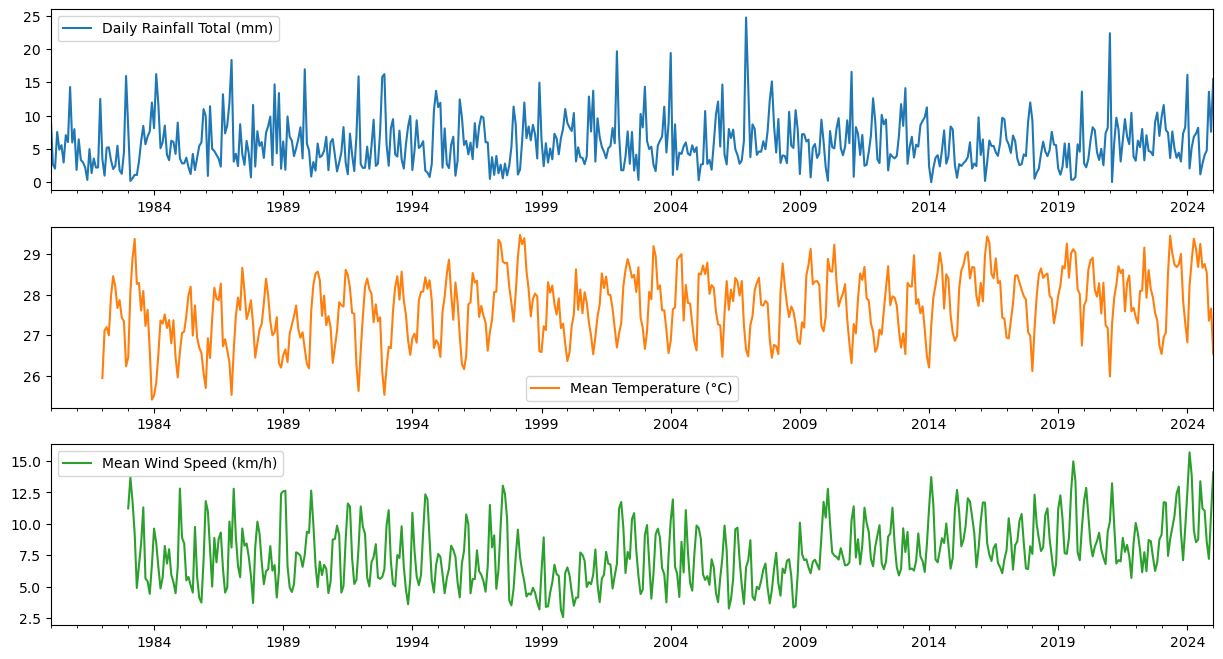

In [38]:
fig, ax = plt.subplots(3, 1, figsize=(15, 8))

df_monthly[['Daily Rainfall Total (mm)']].plot(ax=ax[0])
df_monthly[['Mean Temperature (°C)']].plot(ax=ax[1], c='C1')
df_monthly[['Mean Wind Speed (km/h)']].plot(ax=ax[2], c='C2')
plt.show()

# Bonus ... taking diff of rainfall and plotting it ... visual check of stationarity.

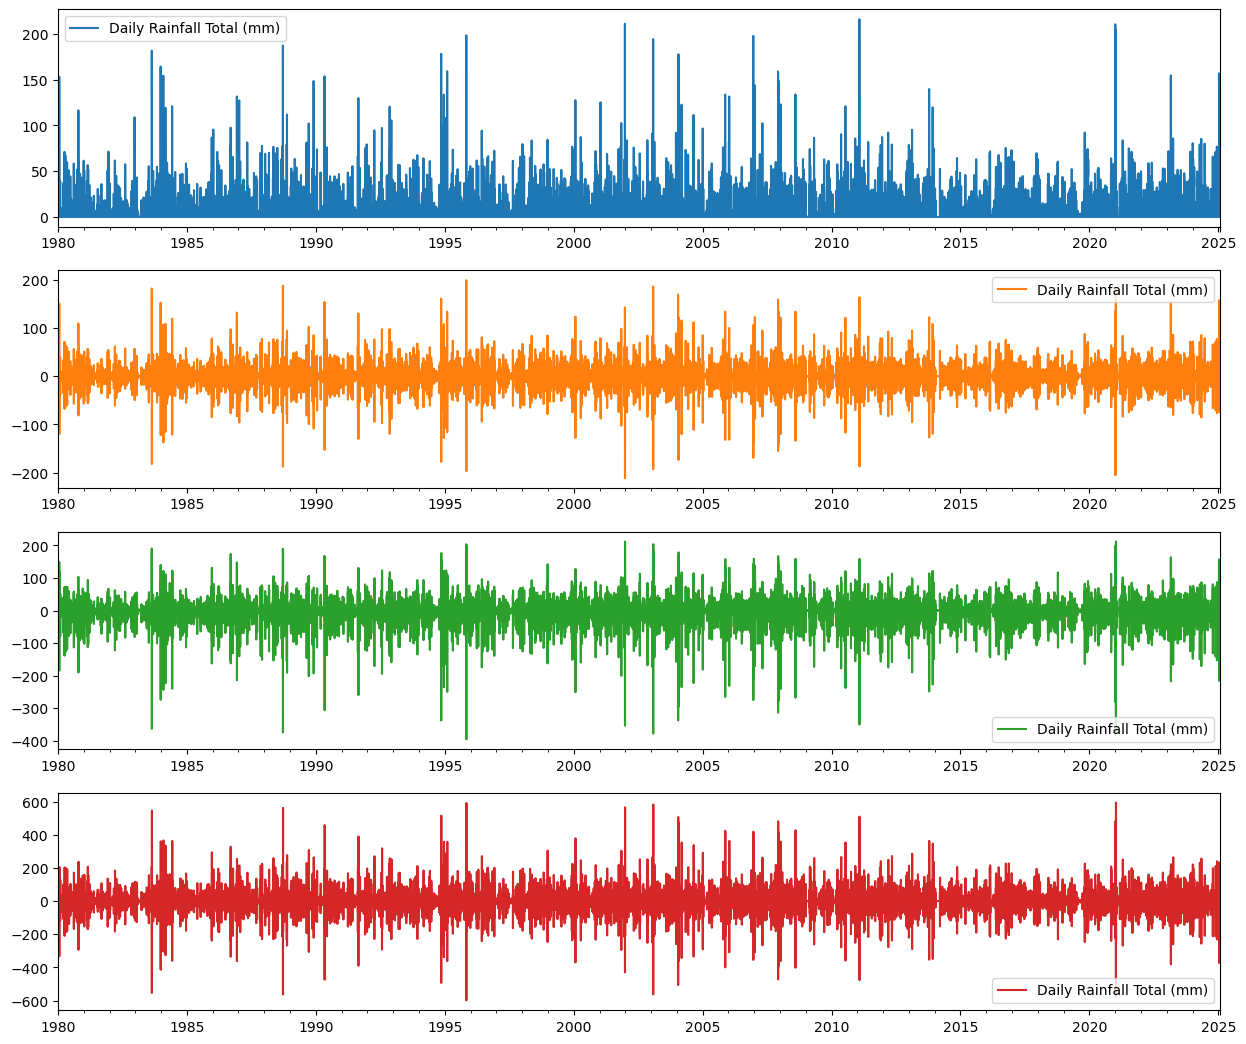

In [39]:
fig, ax = plt.subplots(4, 1, figsize=(15, 13))
df[['Daily Rainfall Total (mm)']].plot(ax=ax[0])
df[['Daily Rainfall Total (mm)']].diff().plot(ax=ax[1], c='C1')
df[['Daily Rainfall Total (mm)']].diff().diff().plot(ax=ax[2], c='C2')
df[['Daily Rainfall Total (mm)']].diff().diff().diff().plot(ax=ax[3], c='C3')
plt.show()

# Of course, these are just plots. Do the relevant test!

# End of example starter code. Have fun!